# Background
External Research from the Centres of Disease Control and Prevention

<b>West Nile Virus<b>

[Key facts](https://www.cdc.gov/westnile/healthcareproviders/healthCareProviders-ClinLabEval.html) regarding the West Nile Virus (WNV):
- The incubation period is typically 2 to 6 days but ranges from 2 to 14 days and can be several weeks in immunocompromised people.
- An estimated 70-80% of human WNV infections are subclinical or asymptomatic.
- Most symptomatic persons experience:
    (a) Acute systemic febrile illness (i.e. relating to fever) that often includes headache, weakness,.. 
    (b) Less than 1% of infected persons develop neuroinvasive disease, which typically manifests as meningitis, encephalitis, or acute flaccid paralysis.
- The [WNV transmission is seasonal](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4125243/). Majority of patients have onset of illness during July–September, and disease incidence usually peaks during August. Localized disease outbreaks often occur.
    


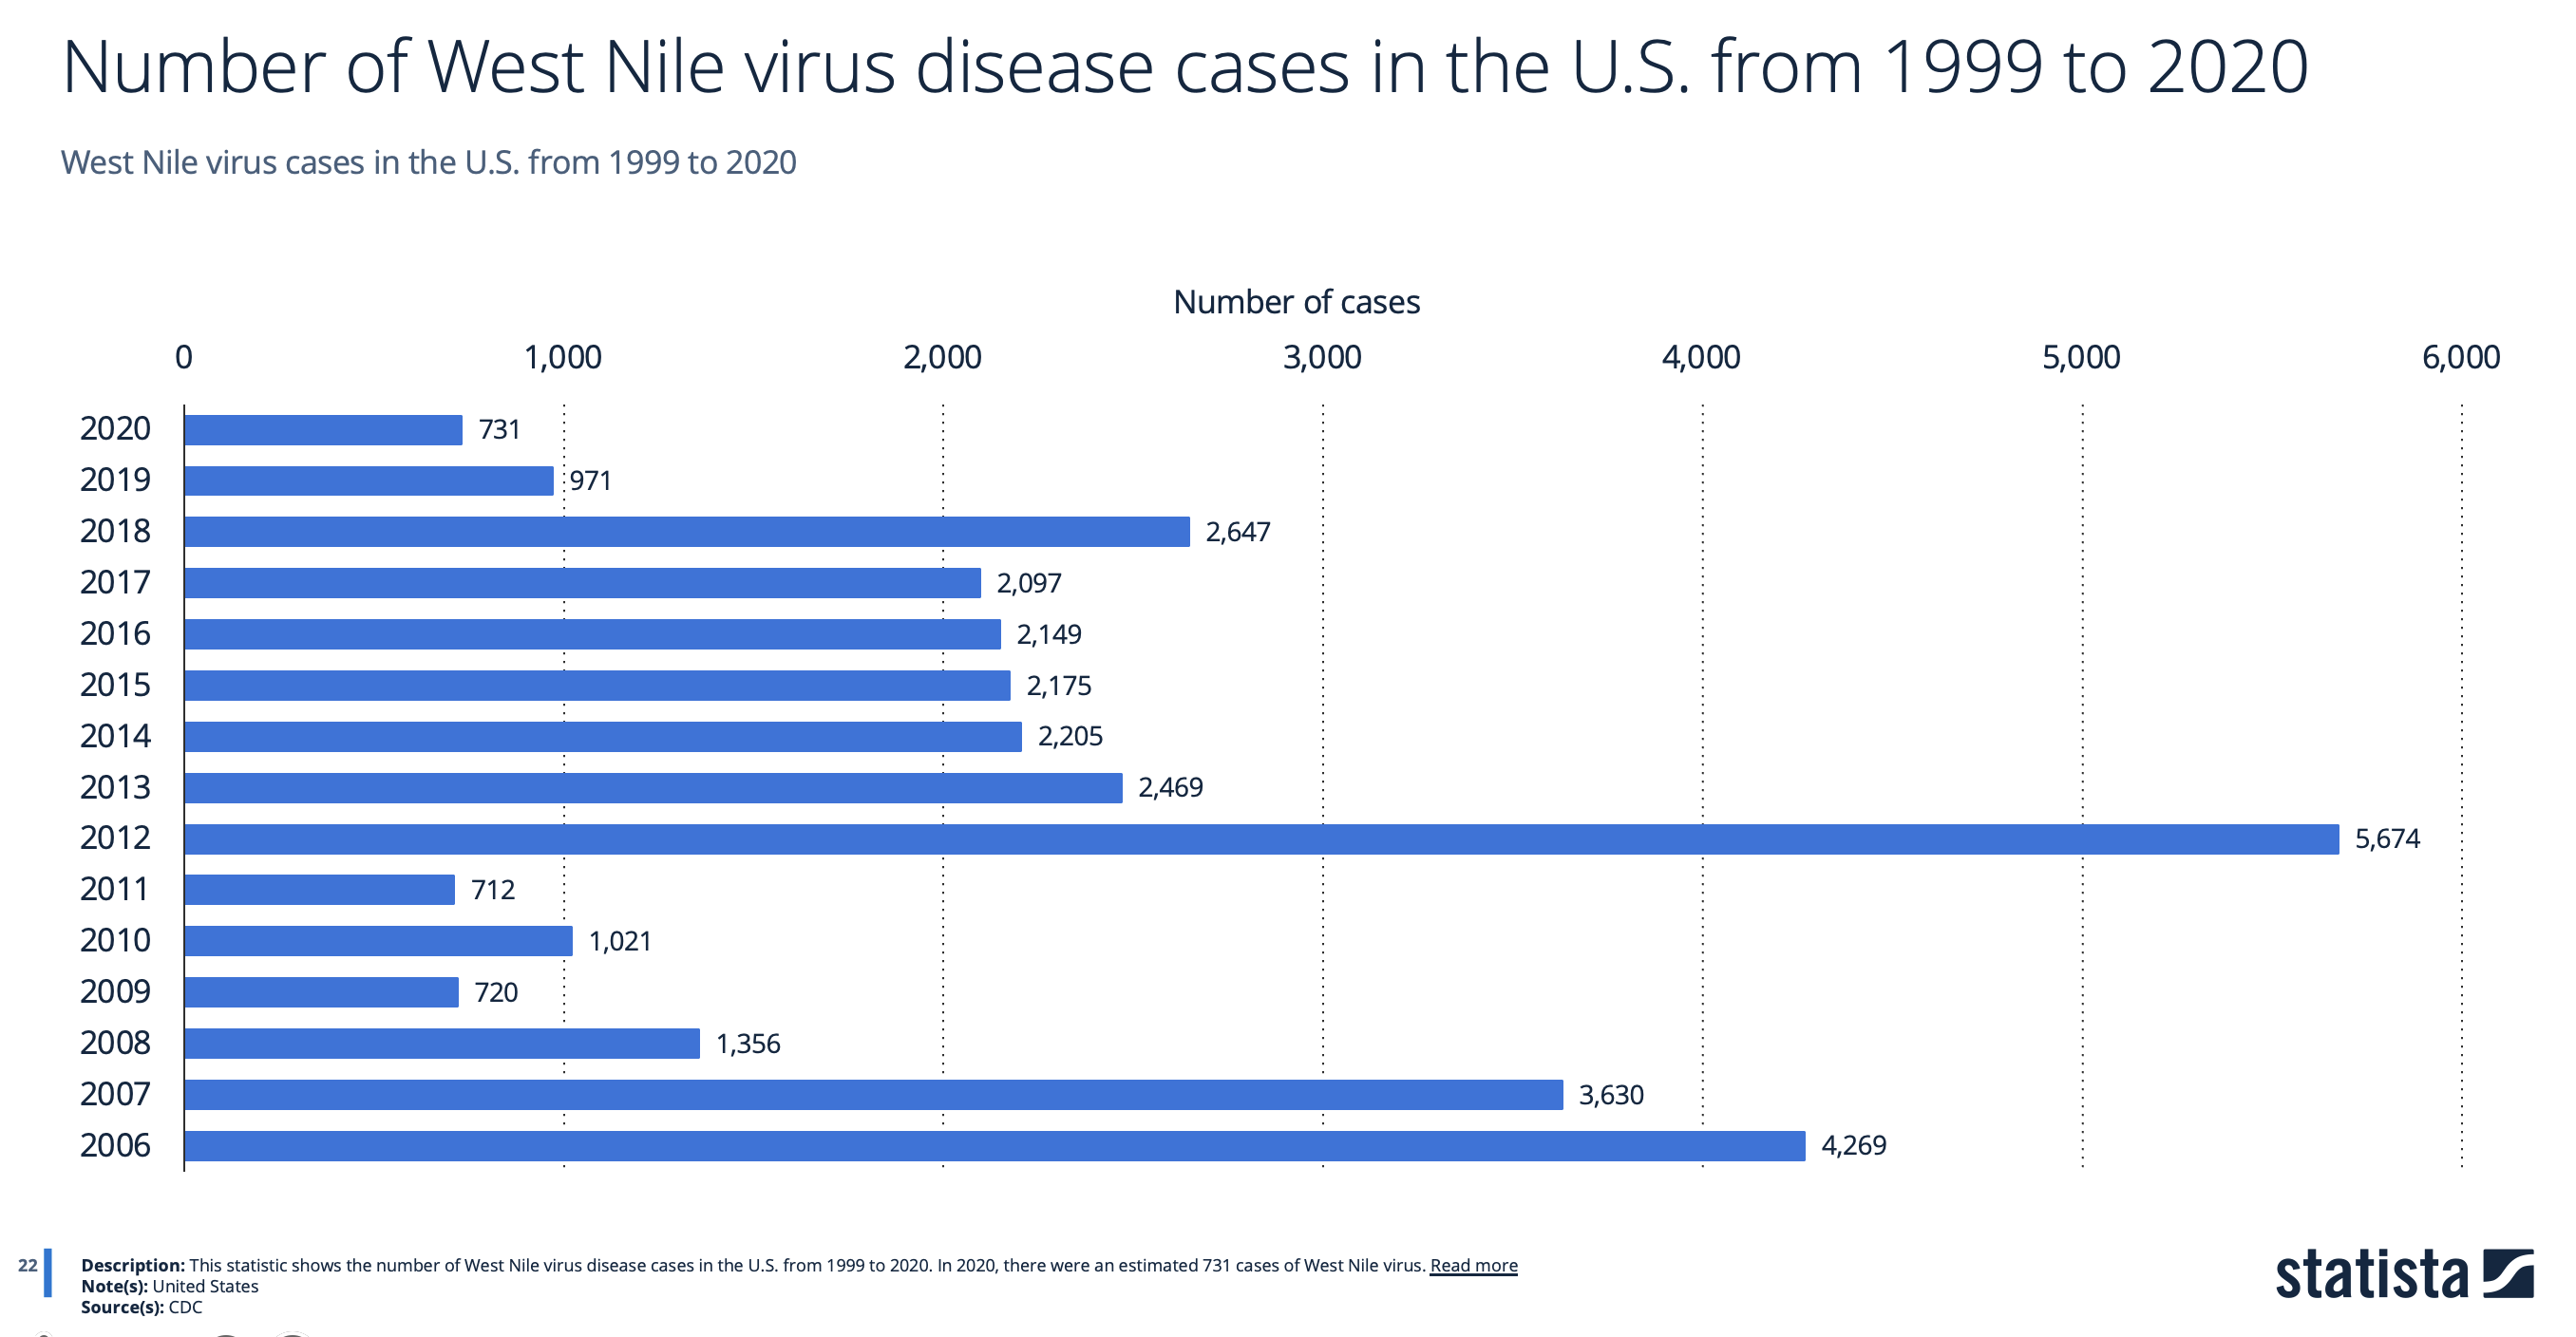

In [1]:
from IPython import display
display.Image("../images/no_of_cases.png")

There was an average of 2,564 cases with WNV disease in 2008, 2010, 2012, and 2014 (years for test cases) in the US.

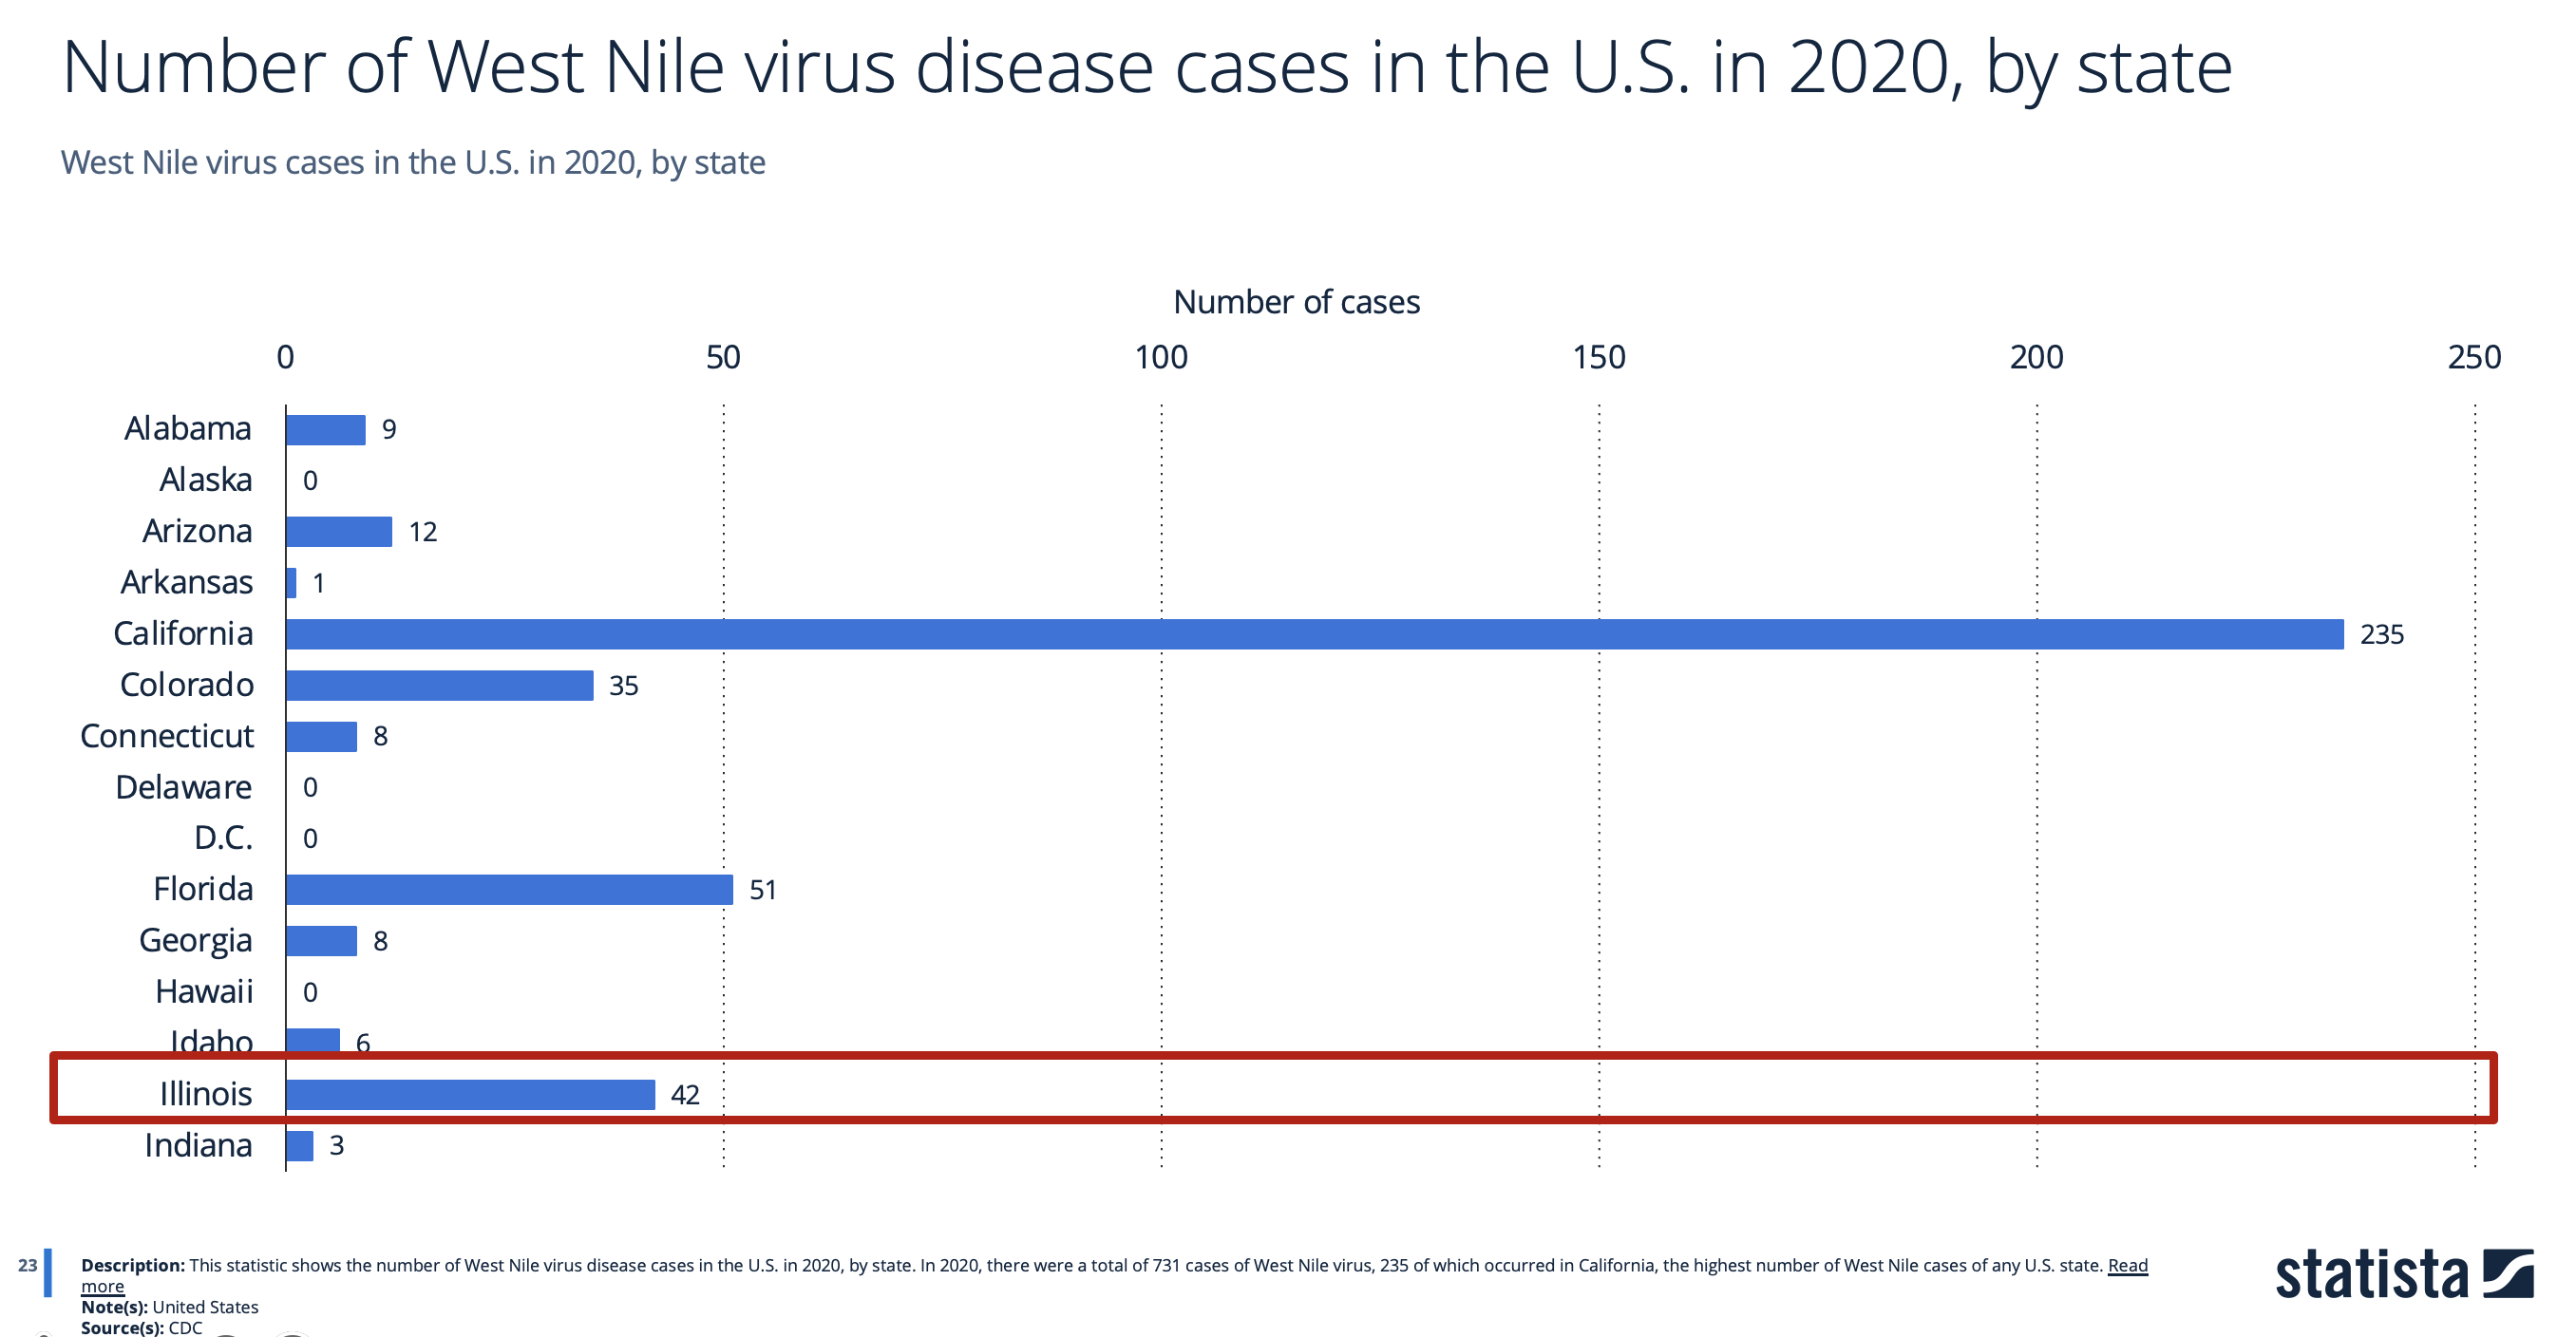

In [2]:
display.Image("../images/cases_state.png")

- Cases in Illinois (Chicago is a city in Cook County Illinois) formed 6% of cases with WNV in USA in 2020.  
- By extension, we assume that 6% of cases (i.e. 154 cases with WNV per year) in the US in 2008, 2010, 2012, and 2014 were from Chicago.

<b>Treatment & Prevention<b>   

Based on [external research](https://www.cdc.gov/westnile/healthcareproviders/healthCareProviders-TreatmentPrevention.html), there is no specific treatment for WNV disease and no WNV vaccines are licensed for use in humans. In the absence of a vaccine, prevention of WNV disease depends on:
    
- community-level mosquito control programs to reduce vector densities;
- personal protective measures to decrease exposure to infected mosquitoes (e.g. reducing mosquito breeding sites at home, repellants,..);
- screening of blood and organ donors. 

Therefore, given the importance of mosquito vector control in the prevention of the spread of WNV, it is valuable to examine the cost-benefit analysis of pesticides spraying.

## Predictions

Based on the best model, the number of traps predicted with WNV present is as follows:

- All trap areas: 149 unique traps
- At 50%: 110 unique traps
- At 80%: 36 traps
 

## Cost Benefit Analysis
The cost-benefit analysis of mosquito vector control for WNV will include the following components:

1. `Identification of Costs`:
The first step is to identify all costs involved in the vector control program, including the cost of the pesticides used, equipment, labor, training, and overheads.

2. `Identification of Benefits`:
The second step is to identify all the benefits of the vector control program, including the reduction in human morbidity and mortality due to WNV infection, reduced healthcare costs, increased productivity, and improved quality of life.

3. `Calculation of the Costs and Benefits`:
Quantify the costs and benefits in monetary terms. This involves estimating the costs of the program and the value of the benefits in terms of dollars.

4. `Discounting`:
Since the costs and benefits of the program occur over time, we will discount them to reflect the time value of money.  We will assume a discount rate of 5%.

5. `Sensitivity Analysis`:
Sensitivity analysis should be conducted to assess the impact of variations in the assumptions used in the analysis on the overall results.

6. `Recommendations`:
Results of the analysis to make recommendations regarding the implementation of the mosquito vector control program for WNV in Chicago.

In addition to these components, the following factors should be further examined in a full-fledged cost-benefit analysis:

1. Epidemiology of WNV:
The prevalence and incidence of WNV in Chicago should be examined to determine the potential impact of the vector control program.

2. Vector Control Techniques:
The efficacy and feasibility of different vector control techniques should be evaluated, including larviciding, adulticiding, and source reduction.

3. Public Health Infrastructure:
The existing public health infrastructure in Chicago should be assessed to determine the capacity for implementing the vector control program.

4. Stakeholder Engagement:
Stakeholder engagement is critical for the success of the program. The analysis should consider the perspectives of different stakeholders, including the government, the public, and private organizations.

5. Environmental Impact:
The potential impact of the vector control program on the environment should be assessed, including the impact on non-target species and the ecosystem.

By including these components and factors, the CBA will provide a comprehensive evaluation of the potential costs and benefits of the mosquito vector control program for WNV in Chicago, and will aid in the decision-making process regarding its implementation.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

#### - Costs: Cost of Spraying
- The cost of Zenivex is $0.67 per acre.  
- Spray area:  The entire city of Chicago has an area size of 607.4 km². Chicago has very few water bodies, and the land area size totals to 589.82 km² (145,748 acres).
- A typical [mosquito treatment](https://www.callnorthwest.com/2019/05/how-long-does-a-mosquito-treatment-last/) lasts about 30 days. After this time, the material begins to degrade making your mosquito protection less effective

In [4]:
#The cost of spraying the full land size of Chicago  
chicago_spray_cost = 0.67 * 145748
chicago_spray_cost

97651.16

In [5]:
#As the effect of spraying lasts for 30 days, given seasonality of the virus, spray should occur between Jun - Sep (i.e. 4 sprays per year) 
chicago_spray_cost= chicago_spray_cost * 4
chicago_spray_cost

390604.64

In [6]:
#Area size of each trap = πr**2 
#Radius of 700ft because spraying has a 300ft dispersement coverage
trap_area = 3.142 * 700**2
trap_area

1539580.0

In [7]:
#Convert sqft to acres
trap_area = trap_area/43560
trap_area

35.343893480257115

In [8]:
#Cost required for each trap = trap_area x zenivex cost
trap_cost = trap_area * 0.67
trap_cost

23.68040863177227

In [9]:
#Total cost = [cost of each trap] x [number of traps] x [number of sprayings]
#The model predicted 149 unique traps where the virus is present
total_trap_cost = trap_cost * 149 * 4
total_trap_cost

14113.523544536272

In [10]:
#Cost savings if spraying is targeted
spray_savings = chicago_spray_cost - total_trap_cost
spray_savings

376491.11645546375

#### - Benefits: Avoidance of Hospitalisation Cost and Productivity Loss
Cost assumptions broken down by the two types of infection (extracted below): (1) West Nile Fever (WNF); and (2) West Nile Neuroinvasive Disease (WNND)

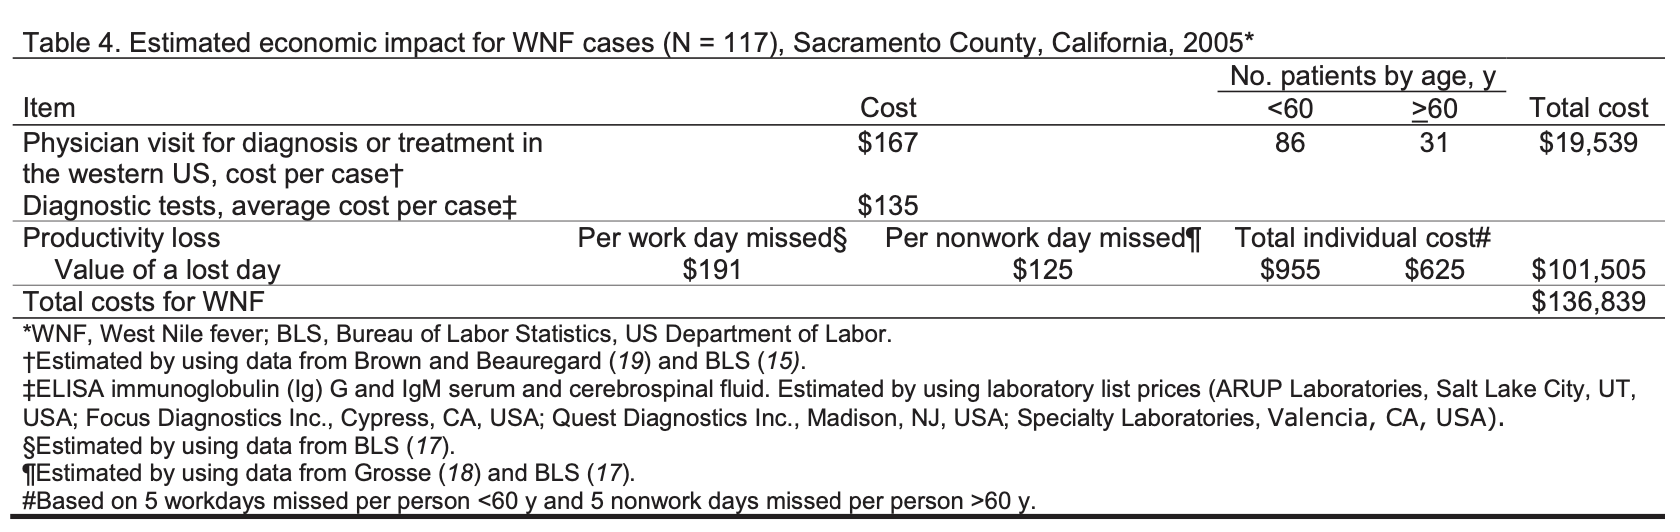

In [11]:
#Estimated Cost of Medical Treatment for WNF cases in 2005
display.Image("../images/costs_WNF.png")

In [12]:
#Convert the cost per case of WNF to present dollar value by adjusting for inflation using CPI inflation calculator from the [US Bureau of Labor Statistics](https://www.bls.gov/data/inflation_calculator.htm)
WNF_indv_cost = 1946  #Based a total indvidual cost of $1092 in 2005$. This figure includes physian visit, diagnostic test, avg productivity loss

In [13]:
#Total Estimated Annual Economic Impact for WNF for 154 cases
WNF_total_cost = WNF_indv_cost * 154
WNF_total_cost

299684

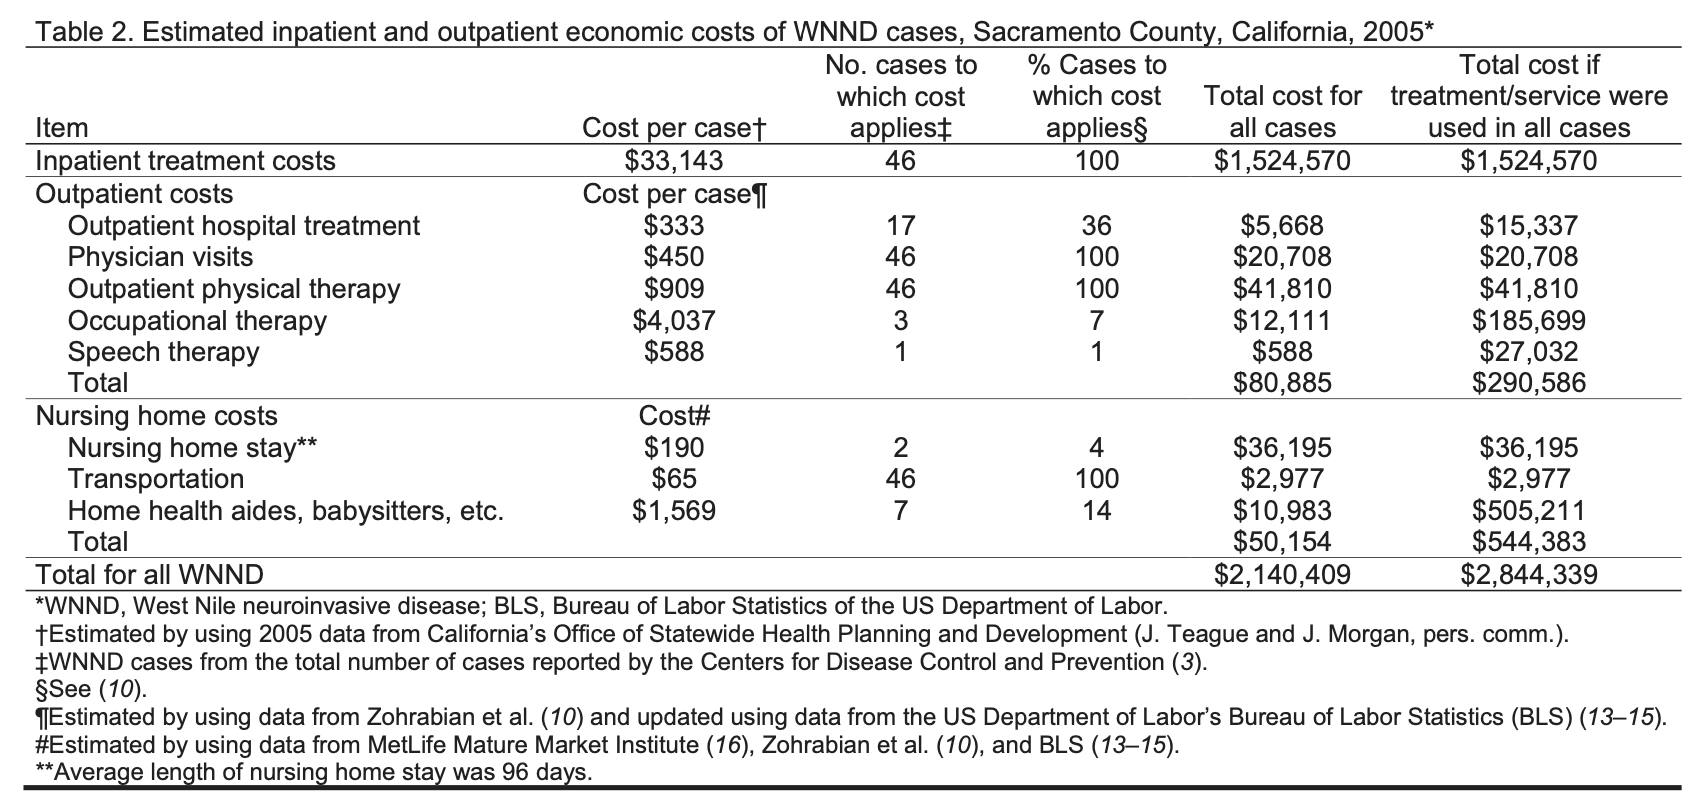

In [14]:
#Estimated Cost of Medical Treatment for WNND cases in 2005
display.Image("../images/costs_WNND.png")

In [15]:
#Convert the cost per case to present dollar value by adjusting for inflation using CPI inflation calculator from the [US Bureau of Labor Statistics](https://www.bls.gov/data/inflation_calculator.htm)
WNND_indv_cost = 54532 #Based on the minimum indvidual cost of $34,567 in 2005$. This figure includes inpatient costs, outpatient physian visit, outpatient physical therapy, nursing home transportation

In [16]:
#Total Estimated Annual Economic Impact for WNND ~1 case per year since only 1% of WNV infection develop WNND
WNND_total_cost = WNND_indv_cost * 1
WNND_total_cost

54532

In [17]:
reduced_annual_healthcarecost = WNF_total_cost + WNND_total_cost
reduced_annual_healthcarecost

354216

## Recommendations

| |$|
|---|---|
|A. Cost Per Trap|23.68| 
|B. Benefits - Cost avoidance per case of WNF |1_946| 
|C. Benefits - Cost avoidance per case of WNND |54_532| 
|D. Total Spray Costs Across Chicago |-390_604| 
|E. Total Spray Costs Across Predicted Areas (149 traps)|-14_113|
|F. Total Spray Savings (F)=(D)-(E) |376_491|
|G. Total Reduced Healthcare Costs (154 WNF)|299_684|
|H. Total Reduced Healthcare Costs (154 WNF & 1 WNND)|354_216|
|---|---|
|I. Net Cost Benefit_WNF (non-targeted) (I)=(D)+(G)|-90_920|
|J. Net Benefit Cost Ratio_WNF (non-targeted) (J)=(G)/(D)|0.767|
|K. Net Cost Benefit_WNF&WNDD (non-targeted) (K)=(D)+(H)|-36_388|
|L. Net Benefit Cost Ratio_WNF&WNDD (non-targeted) (L)=(H)/(D)|0.907|
|---|---|
|M. Net Cost Benefit_WNF (targeted) (M)=(E)+(G)|285_571|
|N. Net Benefit Cost Ratio_WNF (targeted) (N)=(G)/(E)|21.2|
|O. Net Cost Benefit_WNF&WNDD (targeted) (O)=(E)+(H)|340_103|
|P. Net Benefit Cost Ratio_WNF&WNDD (targeted) (P)=(H)/(E)|25.1|

We see that the benefit-cost ratio option for targeted spraying at the predicted traps is 25.1, while the benefit-cost ratio of mass spraying over chicago is 0.907. A benefit cost ratio of greater than 1 indicates that the program is generating more benefits than costs, and is therefore considered a cost-effective program. This means that for every dollar spent on the vector control program, spraying at the predicted spray areas will see a benefit of $21.20 in reduced healthcare costs. 


Since targeted spraying has a significantly higher benefit to cost ratio than mass spraying,  members of the CDC should consider spraying at the targeted spray sites particularly those with higher probability of WNV present for greater cost efficiency. 


It's worth noting that this calculation only takes into account the direct benefits and costs of the program, and does not include any indirect benefits or costs, such as other side effects of the pesiticides (e.g. individuals with respiratory problems, allergies, or other health conditions may be more vulnerable to the effects of Zenivex).

For completeness of analysis, we will perform discounting and sensitivity analysis of of the cost benefit of the mosquite vector conrol programme over a 10-year period

#### - Discounting
Assuming over a ten-year period at 5% discount rate

In [18]:
# Define the inputs
annual_spray_cost = 14113
annual_healthcare_cost_reduction = 299684
discount_rate = 0.05
years = 10

# Calculate the PV of the costs and benefits for each year
pv_costs = [annual_spray_cost / (1 + discount_rate) ** i for i in range(1, years+1)]
pv_benefits = [annual_healthcare_cost_reduction / (1 + discount_rate) ** i for i in range(1, years+1)]

# Calculate the NPV of the program
npv = sum(pv_benefits) - sum(pv_costs)

# Print the results
print(f"Net Present Value (NPV) over {years} years with discount rate of {discount_rate:.0%}: ${npv:.2f}")

Net Present Value (NPV) over 10 years with discount rate of 5%: $2205103.57


#### - Sensitivity Analysis
Performing a sensitivity analysis across various discount rates of 5%, 8%, 10%

In [19]:
# Define the inputs
annual_spray_cost = 14113
annual_healthcare_cost_reduction = 299684
discount_rates = [0.05, 0.08, 0.1]
years = 10

# Loop over each discount rate and calculate the NPV
for discount_rate in discount_rates:
    # Calculate the PV of the costs and benefits for each year
    pv_costs = [annual_spray_cost / (1 + discount_rate) ** i for i in range(1, years+1)]
    pv_benefits = [annual_healthcare_cost_reduction / (1 + discount_rate) ** i for i in range(1, years+1)]

    # Calculate the NPV of the program
    npv = sum(pv_benefits) - sum(pv_costs)

    # Print the results
    print(f"Net Present Value (NPV) over {years} years with discount rate of {discount_rate:.0%}: ${npv:.2f}")


Net Present Value (NPV) over 10 years with discount rate of 5%: $2205103.57
Net Present Value (NPV) over 10 years with discount rate of 8%: $1916204.66
Net Present Value (NPV) over 10 years with discount rate of 10%: $1754710.17
